<h1 align="center"><font size="6">Qualidade Vinho Tinto</font></h1>

Nesse trabalho, será desenvolvido um modelo capaz de classificar a qualidade de um vinho tinto atráves de modelo de regressão e de árvore de decisão.

### Importando os dados e bibliotecas

Dados importados foram fornecidos peolo Kaggle em https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/data

In [322]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [323]:
wine_df = pd.read_csv("winequality-red.csv", sep =',')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<h1 align="center"><font size="6"> Regressão Logistica</font></h1>

Enquanto a Regressão Linear é adequada para estimar valores contínuos (por exemplo, estimar o preço de um imóvel), não é a melhor ferramenta para prever a classe de um ponto de dados observado. Para estimar a classe de um determinado dado, precisamos de algum tipo de orientação sobre a qual seria a **classe mais provável** para esse dado. Para isso, usamos **Regressão Logística**.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Relembrando a Regressão Linear:</strong></font>
<br>
<br>
    Como você sabe, a <b>regressão linear</b> encontra uma função que relaciona uma variável dependente contínua, <b>y</b>, a alguns preditores (variáveis independentes $x_1$, $x_2$, etc.). Por exemplo, a regressão linear simples assume uma função da forma:
<br><br>
$$
y = \theta_0 + \theta_1  x_1 + \theta_2  x_2 + \cdots
$$
<br>
e encontra os valores dos parâmetros $\theta_0, \theta_1, \theta_2$, etc, onde o termo $\theta_0$ é o "intercepto". Pode ser geralmente mostrado como:
<br><br>
$$
ℎ_\theta(𝑥) = \theta^TX
$$
<p></p>

</div>
A **Regressão Logística** é uma variação da Regressão Linear. É útil quando a variável dependente observada, <b>y</b>, é categórica. Ela produz uma fórmula que prevê a probabilidade do rótulo da classe como uma função das variáveis independentes.

A regressão logística ajusta-se a uma curva especial em forma de s tomando a regressão linear e transformando a estimativa numérica em uma probabilidade com a seguinte função, denominada função sigmoide 𝜎:
$$
ℎ_\theta(𝑥) = \sigma({\theta^TX}) =  \frac {e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +...)}}{1 + e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +\cdots)}}
$$
Ou:
$$
ProbabilidadeDaClasse_1 =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}} 
$$

Nesta equação, ${\theta^TX}$ é o resultado da regressão (a soma das variáveis ponderadas pelos coeficientes), 'exp' é a função exponencial e $\sigma(\theta^TX)$ é a função sigmóide ou [logística] (http: //en.wikipedia .org / wiki / Logistic_function), também chamado de curva logística, e possui o formato de um "S" (curva sigmóide).

Então, resumidamente, a regressão logística passa a entrada através da função logística/sigmoide, mas depois trata o resultado como uma probabilidade:

<img
src="https://ibm.box.com/shared/static/kgv9alcghmjcv97op4d6onkyxevk23b1.png" width="400" align="center">

O objetivo do algoritmo de __Regressão Logística__, é encontrar os melhores parâmetros θ, para $ ℎ_\theta(𝑥)$ = $\sigma({\theta^TX})$, de tal forma que o modelo prediga melhor a classe de cada caso. 

#### Material retirado da própria aula, para melhor exemplificar

In [324]:
wine_df = wine_df[['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'pH', 'density', 'sulphates', 'quality']]
wine_df['quality'] = wine_df['quality'].astype('int')
wine_df.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,pH,density,sulphates,quality
0,7.4,0.70,1.9,0.076,11.0,3.51,0.9978,0.56,5
1,7.8,0.88,2.6,0.098,25.0,3.20,0.9968,0.68,5
2,7.8,0.76,2.3,0.092,15.0,3.26,0.9970,0.65,5
3,11.2,0.28,1.9,0.075,17.0,3.16,0.9980,0.58,6
4,7.4,0.70,1.9,0.076,11.0,3.51,0.9978,0.56,5


In [325]:
X = np.asarray(wine_df[['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'pH', 'density']])
X[0:100]

array([[7.40e+00, 7.00e-01, 1.90e+00, 7.60e-02, 1.10e+01, 3.51e+00,
        9.98e-01],
       [7.80e+00, 8.80e-01, 2.60e+00, 9.80e-02, 2.50e+01, 3.20e+00,
        9.97e-01],
       [7.80e+00, 7.60e-01, 2.30e+00, 9.20e-02, 1.50e+01, 3.26e+00,
        9.97e-01],
       [1.12e+01, 2.80e-01, 1.90e+00, 7.50e-02, 1.70e+01, 3.16e+00,
        9.98e-01],
       [7.40e+00, 7.00e-01, 1.90e+00, 7.60e-02, 1.10e+01, 3.51e+00,
        9.98e-01],
       [7.40e+00, 6.60e-01, 1.80e+00, 7.50e-02, 1.30e+01, 3.51e+00,
        9.98e-01],
       [7.90e+00, 6.00e-01, 1.60e+00, 6.90e-02, 1.50e+01, 3.30e+00,
        9.96e-01],
       [7.30e+00, 6.50e-01, 1.20e+00, 6.50e-02, 1.50e+01, 3.39e+00,
        9.95e-01],
       [7.80e+00, 5.80e-01, 2.00e+00, 7.30e-02, 9.00e+00, 3.36e+00,
        9.97e-01],
       [7.50e+00, 5.00e-01, 6.10e+00, 7.10e-02, 1.70e+01, 3.35e+00,
        9.98e-01],
       [6.70e+00, 5.80e-01, 1.80e+00, 9.70e-02, 1.50e+01, 3.28e+00,
        9.96e-01],
       [7.50e+00, 5.00e-01, 6.10e+00, 7.10e

In [326]:
y = np.asarray(wine_df['quality'])
y [0:10]

array([5, 5, 5, 6, 5, 5, 5, 7, 7, 5])

In [327]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:10]

array([[-0.53,  0.96, -0.45, -0.24, -0.47,  1.29,  0.56],
       [-0.3 ,  1.97,  0.04,  0.22,  0.87, -0.72,  0.03],
       [-0.3 ,  1.3 , -0.17,  0.1 , -0.08, -0.33,  0.13],
       [ 1.65, -1.38, -0.45, -0.26,  0.11, -0.98,  0.66],
       [-0.53,  0.96, -0.45, -0.24, -0.47,  1.29,  0.56],
       [-0.53,  0.74, -0.52, -0.26, -0.27,  1.29,  0.56],
       [-0.24,  0.4 , -0.67, -0.39, -0.08, -0.07, -0.18],
       [-0.59,  0.68, -0.95, -0.48, -0.08,  0.51, -1.14],
       [-0.3 ,  0.29, -0.38, -0.31, -0.66,  0.32,  0.03],
       [-0.47, -0.16,  2.53, -0.35,  0.11,  0.25,  0.56]])

In [328]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.5, random_state=4)
print ('Dados de Treinamento:', X_train.shape,  y_train.shape)
print ('Dados de Validação:', X_test.shape,  y_test.shape)

Dados de Treinamento: (799, 7) (799,)
Dados de Validação: (800, 7) (800,)


In [329]:
RL = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
RL

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

In [330]:
yhat = RL.predict(X_test)
yhat

array([5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6,
       5, 5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6,
       5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5,
       6, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5,
       6, 5, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5,
       5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5,
       5, 6, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6,
       5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5,
       6, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 5,
       6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5,
       5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 6, 5, 5,
       6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5,
       5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5,
       5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 6,

In [331]:
yhat_prob = RL.predict_proba(X_test)
yhat_prob

array([[0.01, 0.02, 0.47, 0.39, 0.1 , 0.01],
       [0.01, 0.04, 0.47, 0.37, 0.1 , 0.01],
       [0.01, 0.03, 0.25, 0.47, 0.23, 0.01],
       ...,
       [0.01, 0.03, 0.46, 0.38, 0.11, 0.01],
       [0.01, 0.03, 0.42, 0.38, 0.14, 0.01],
       [0.01, 0.04, 0.35, 0.45, 0.14, 0.01]])

In [332]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.52125

## Matriz de confusão

É um tabela que mostra as frequências de classificação para cada classe do modelo.

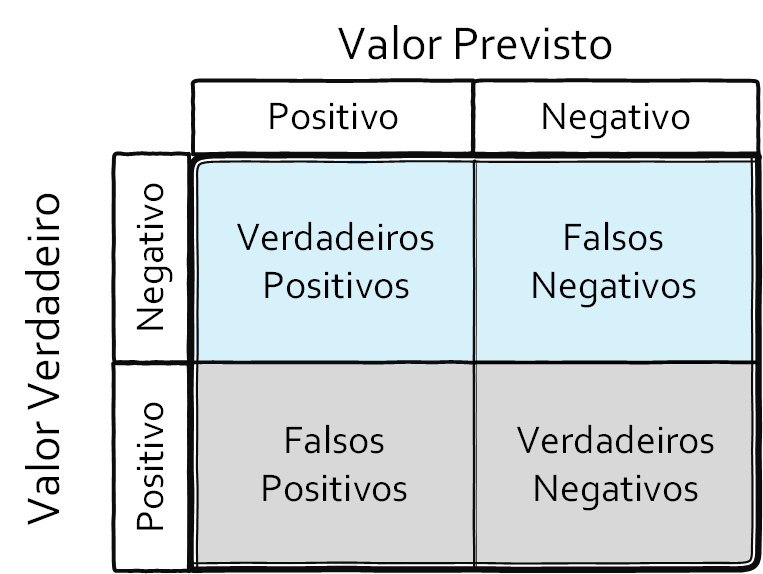

In [333]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de Confusão',
                          cmap=plt.cm.Blues):
    """
    Esta função imprime e plota a matriz de confusão.
    A normalização pode ser aplicada configurando 'normalize = True'.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusão normalizada")
    else:
        print("Matriz de confusão, sem normalização")

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Valor Verdadeiro')
    plt.xlabel('Valor Previsto')
print(confusion_matrix(y_test, yhat, labels=[5,6]))

[[262  76]
 [169 155]]


Matriz de confusão, sem normalização
[[262  76]
 [169 155]]


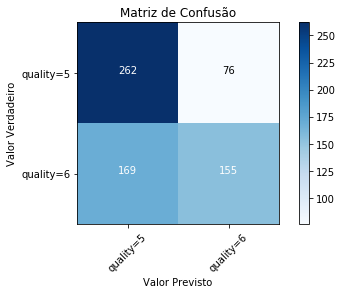

In [334]:
# Calcula a Matriz de Confusão
cnf_matrix = confusion_matrix(y_test, yhat, labels=[5,6])
np.set_printoptions(precision=2)


# Plota a Matriz de Confusão não-normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['quality=5','quality=6'],normalize= False,  title='Matriz de Confusão')

In [335]:
print (classification_report(y_test, yhat))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         4
          4       0.00      0.00      0.00        27
          5       0.55      0.78      0.64       338
          6       0.48      0.48      0.48       324
          7       0.00      0.00      0.00        99
          8       0.00      0.00      0.00         8

avg / total       0.43      0.52      0.47       800



S:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<h1><center>Classificação: Árvore de Decisão</center></h1>

Nessa segunda parte será construido um modelo de classificação com a teoria de árovre de decisão

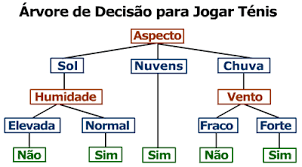

In [336]:
X = wine_df[['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'pH', 'density', 'sulphates']].values
X[0:9]

array([[ 7.4 ,  0.7 ,  1.9 ,  0.08, 11.  ,  3.51,  1.  ,  0.56],
       [ 7.8 ,  0.88,  2.6 ,  0.1 , 25.  ,  3.2 ,  1.  ,  0.68],
       [ 7.8 ,  0.76,  2.3 ,  0.09, 15.  ,  3.26,  1.  ,  0.65],
       [11.2 ,  0.28,  1.9 ,  0.07, 17.  ,  3.16,  1.  ,  0.58],
       [ 7.4 ,  0.7 ,  1.9 ,  0.08, 11.  ,  3.51,  1.  ,  0.56],
       [ 7.4 ,  0.66,  1.8 ,  0.07, 13.  ,  3.51,  1.  ,  0.56],
       [ 7.9 ,  0.6 ,  1.6 ,  0.07, 15.  ,  3.3 ,  1.  ,  0.46],
       [ 7.3 ,  0.65,  1.2 ,  0.07, 15.  ,  3.39,  0.99,  0.47],
       [ 7.8 ,  0.58,  2.  ,  0.07,  9.  ,  3.36,  1.  ,  0.57]])

In [337]:
y = wine_df["quality"]
y[0:5]

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int32

In [338]:
from sklearn.model_selection import train_test_split

In [339]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [340]:
wineQuality = DecisionTreeClassifier(criterion="entropy", max_depth = 60)
wineQuality

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=60,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [341]:
wineQuality.fit(X_trainset,y_trainset)
predTree = wineQuality.predict(X_testset)

In [342]:
print (predTree [0:5])
print (y_testset [0:5])

[5 5 6 8 5]
147     5
937     4
877     6
1000    7
73      4
Name: quality, dtype: int32


In [343]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Precisão da Árvore de Decisão: ", metrics.accuracy_score(y_testset, predTree))

Precisão da Árvore de Decisão:  0.5875
